In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score            # 決定係数


from pandas import DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

sns.set()

import day.csv, hour.csv

In [3]:
df_day = pd.read_csv("day.csv", parse_dates=["dteday"])
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

C:\Users\satom\AppData\Local\Temp\ipykernel_11552\85836405.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_day.corr(), dtype=np.bool))
C:\Users\satom\AppData\Local\Temp\ipykernel_11552\85836405.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_day.corr(), dtype=np.bool))
C:\Users\satom\AppData\Local\Temp\ipykernel_11552\85836405.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future ver

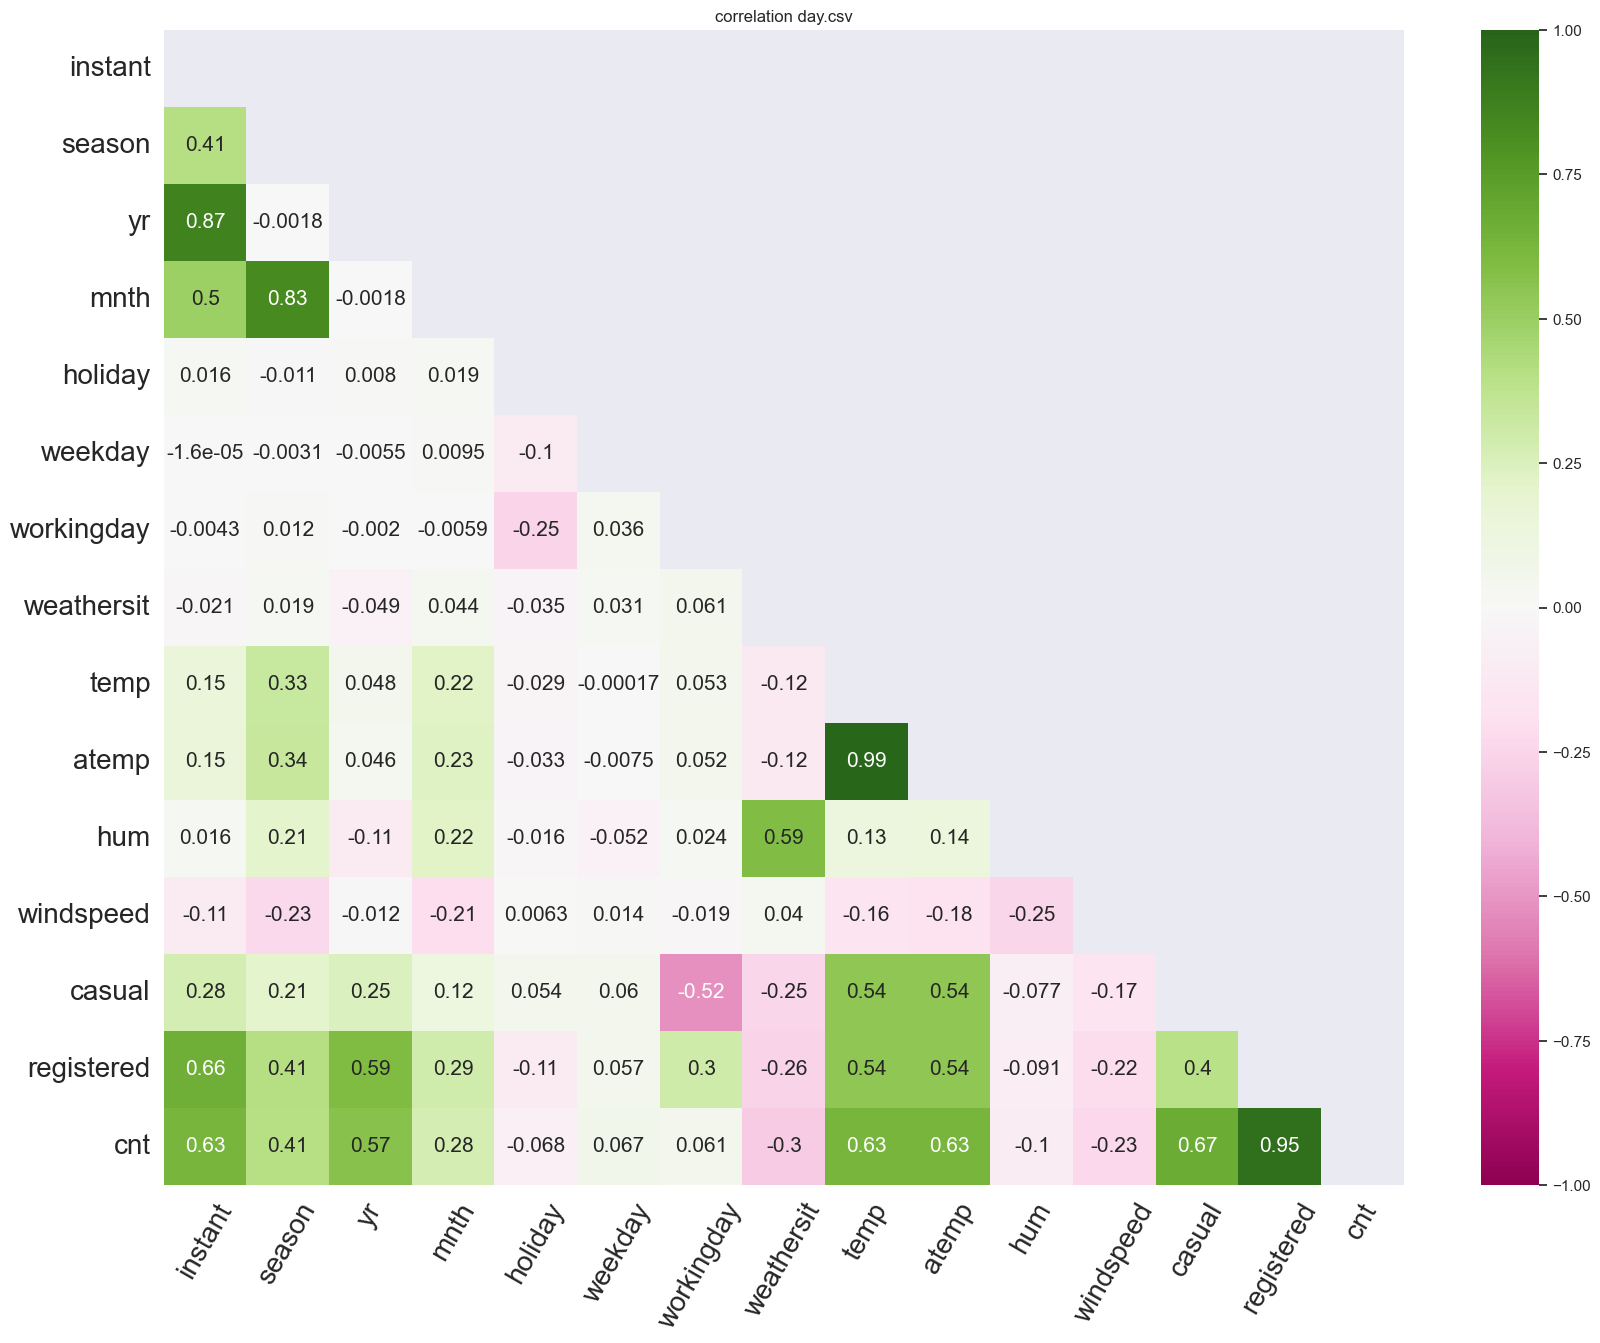

In [5]:
plt.figure(figsize= (20,15))
mask = np.triu(np.ones_like(df_day.corr(), dtype=np.bool))
ax = sns.heatmap(df_day.corr(), vmin=-1, vmax = 1, mask = mask, annot=True, annot_kws={"size": 15},cmap="PiYG")
plt.xticks(rotation=60)
plt.yticks(rotation = 0)
plt.title("correlation day.csv")
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.show()


create new columns, year, temeperature and feeling temperature in celsius, windspeed

In [6]:
df_day["year"] = df_day["yr"].apply(lambda value: 2011
if value < 1 else 2012
)
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012


In [7]:
t_min = -8
t_max = 39

df_day["temp_in_cel"] = t_min + df_day["temp"] * (t_max -t_min)
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,2011.500684,15.283085
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.500342,8.603397
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,2011.000000,-5.220871
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,2011.000000,7.842925
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,2012.000000,15.421651
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,2012.000000,22.804575
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,2012.000000,32.498349


In [8]:
t_min = -16
t_max = 50

df_day["feeling_temp_in_cel"] = t_min + df_day["atemp"] * (t_max -t_min)
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel,feeling_temp_in_cel
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,2011.500684,15.283085,15.307363
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.500342,8.603397,10.755438
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,2011.000000,-5.220871,-10.781406
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,2011.000000,7.842925,6.297605
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,2012.000000,15.421651,16.124378
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,2012.000000,22.804575,24.167732
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,2012.000000,32.498349,39.499136


In [9]:
df_day["windspeed_a"] = df_day["windspeed"] * 67
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel,feeling_temp_in_cel,windspeed_a
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,8.175849,7.999250,10.749882
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,9.083466,7.346774,16.652113
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1.229108,-3.499270,16.636703
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1.400000,-1.999948,10.739832
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,2.666979,-0.868180,12.522300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012,3.945849,-1.041628,23.458911
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012,3.906651,0.833036,10.416557
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012,3.906651,-0.001600,8.333661
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012,4.024151,-0.707800,23.500518


In [10]:
df_hour = pd.read_csv("hour.csv", parse_dates= ["dteday"])
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [11]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [12]:
df_hour["year"] = df_hour["yr"].apply(lambda value: 2011
if value < 1 else 2012
)
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,2012


In [13]:
t_min = -8
t_max = 39

df_hour["temp_in_cel"] = t_min + df_hour["temp"] * (t_max -t_min)
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2011.502561,15.358397
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.500008,9.050138
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,-7.060000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011.000000,7.980000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012.000000,15.500000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012.000000,23.020000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012.000000,39.000000


In [14]:
t_min = -16
t_max = 50

df_hour["feeling_temp_in_cel"] = t_min + df_hour["atemp"] * (t_max -t_min)
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel,feeling_temp_in_cel
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2011.502561,15.358397,15.401157
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.500008,9.050138,11.342114
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,-7.060000,-16.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011.000000,7.980000,5.997800
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012.000000,15.500000,15.996800
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012.000000,23.020000,24.999200
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012.000000,39.000000,50.000000


In [15]:
df_day["windspeed_a"] = df_day["windspeed"] * 67
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,temp_in_cel,feeling_temp_in_cel,windspeed_a
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,8.175849,7.999250,10.749882
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,9.083466,7.346774,16.652113
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1.229108,-3.499270,16.636703
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1.400000,-1.999948,10.739832
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,2.666979,-0.868180,12.522300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012,3.945849,-1.041628,23.458911
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012,3.906651,0.833036,10.416557
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012,3.906651,-0.001600,8.333661
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012,4.024151,-0.707800,23.500518


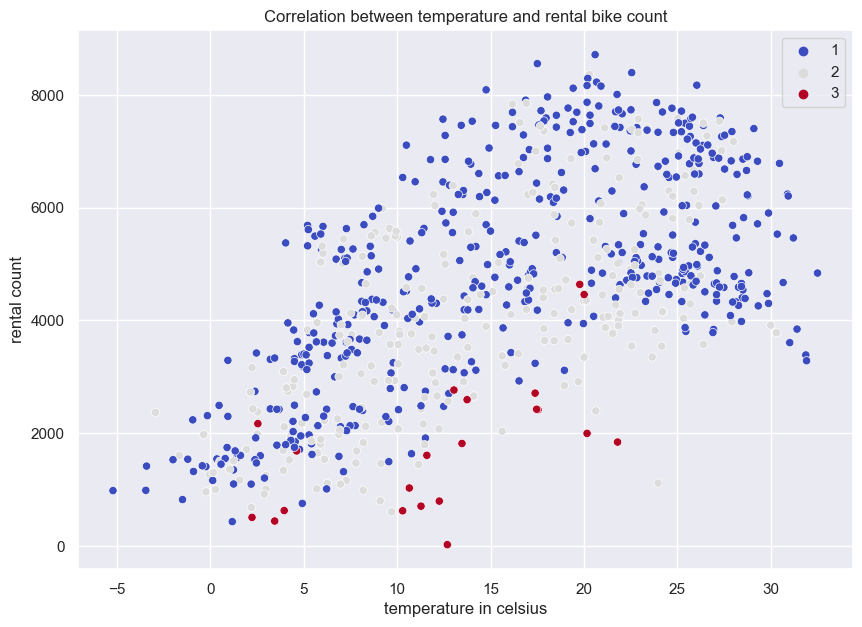

In [16]:
palette = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(10,7))
sns.scatterplot(data = df_day, x = df_day["temp_in_cel"], y = df_day["cnt"], hue = "weathersit", palette=palette)
#sns.regplot(data = df_day, x = df_day["temp_in_cel"], y = df_day["cnt"])
plt.title("Correlation between temperature and rental bike count")
plt.xlabel("temperature in celsius")
plt.ylabel("rental count")

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


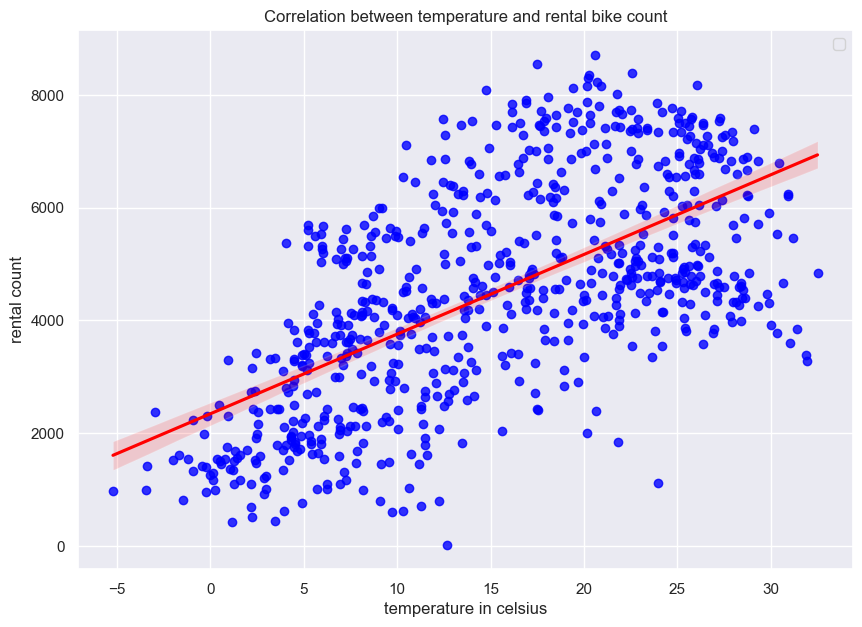

In [17]:
palette = sns.color_palette("flare", as_cmap=True)
plt.figure(figsize=(10,7))
sns.regplot(data = df_day, x = df_day["temp_in_cel"], y = df_day["cnt"], scatter_kws={"color": "blue"}, line_kws = {"color" : "red"})
plt.title("Correlation between temperature and rental bike count")
plt.xlabel("temperature in celsius")
plt.ylabel("rental count")

plt.legend()
plt.show()

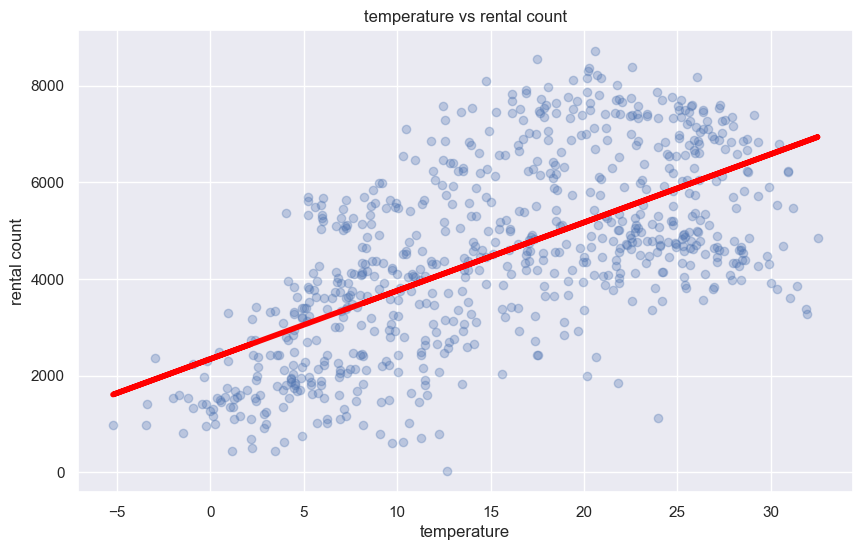

In [18]:
X = df_day[["temp_in_cel"]]
y = df_day["cnt"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

linearReg = LinearRegression()
linearReg.fit(X, y)

plt.figure(figsize = (10,6))
plt.scatter(X,y, alpha = 0.3)
plt.plot(X, linearReg.predict(X), color = "red", linewidth = 4 )
plt.title("temperature vs rental count")
plt.xlabel("temperature")
plt.ylabel("rental count")
plt.show()


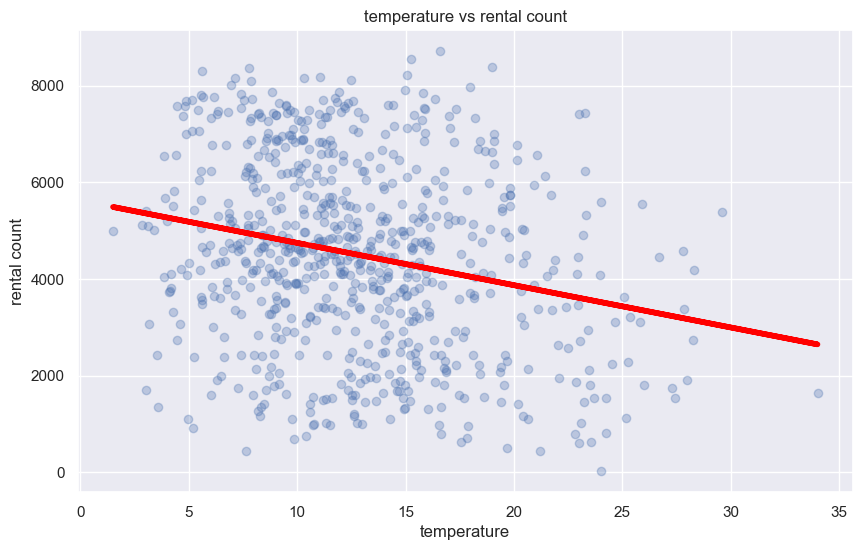

In [19]:
X = df_day[["windspeed_a"]]
y = df_day["cnt"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

linearReg = LinearRegression()
linearReg.fit(X, y)

plt.figure(figsize = (10,6))
plt.scatter(X,y, alpha = 0.3)
plt.plot(X, linearReg.predict(X), color = "red", linewidth = 4 )
plt.title("temperature vs rental count")
plt.xlabel("temperature")
plt.ylabel("rental count")
plt.show()

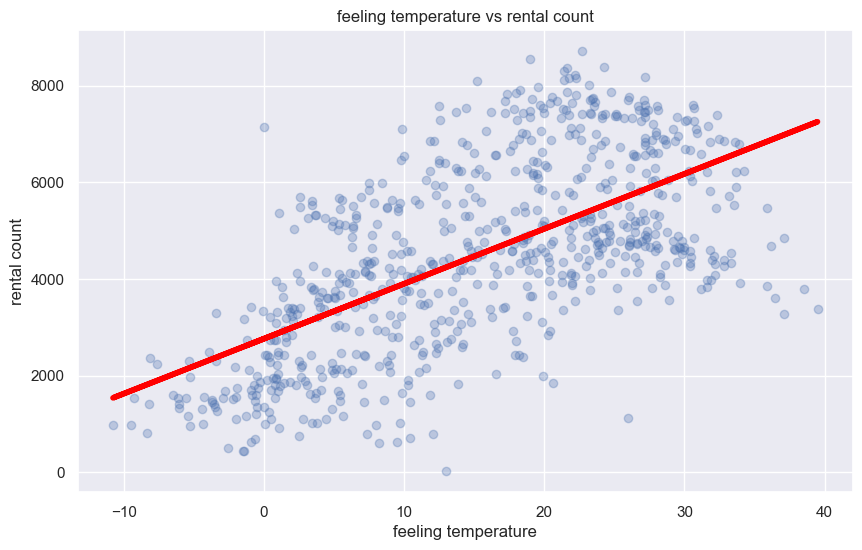

In [20]:
X = df_day[["feeling_temp_in_cel"]]
y = df_day["cnt"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

linearReg = LinearRegression()
linearReg.fit(X, y)

plt.figure(figsize = (10,6))
plt.scatter(X,y, alpha = 0.3)
plt.plot(X, linearReg.predict(X), color = "red", linewidth = 4 )
plt.title("feeling temperature vs rental count")
plt.xlabel("feeling temperature")
plt.ylabel("rental count")
plt.show()

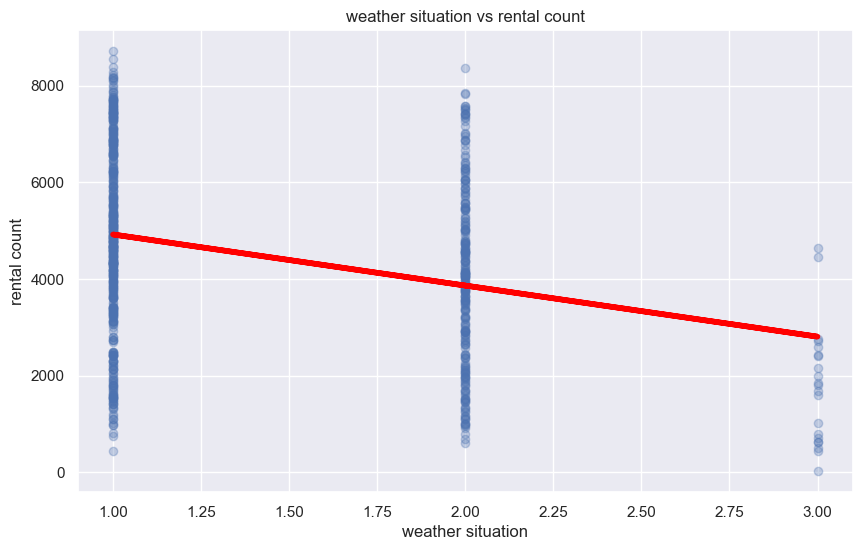

In [21]:
X = df_day[["weathersit"]]
y = df_day["cnt"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

linearReg = LinearRegression()
linearReg.fit(X, y)

plt.figure(figsize = (10,6))
plt.scatter(X,y, alpha = 0.3)
plt.plot(X, linearReg.predict(X), color = "red", linewidth = 4 )
plt.title("weather situation vs rental count")
plt.xlabel("weather situation")
plt.ylabel("rental count")
plt.show()

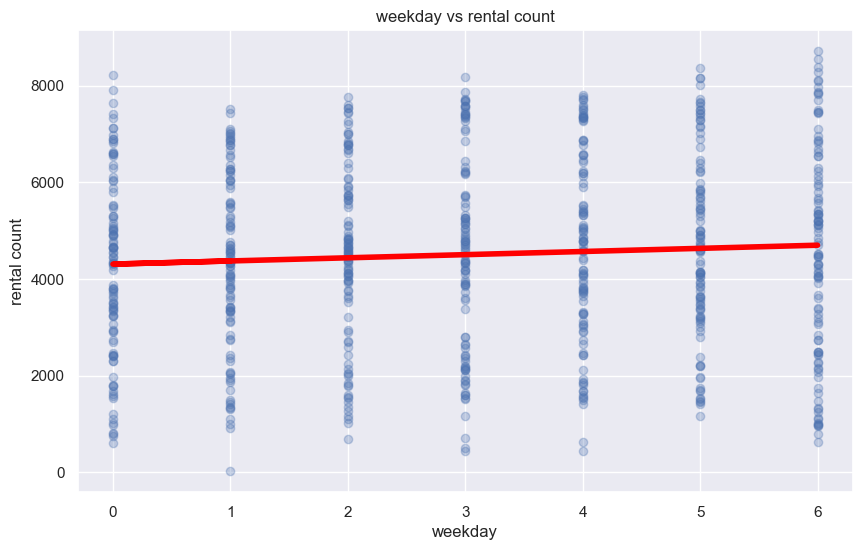

In [22]:
X = df_day[["weekday"]]
y = df_day["cnt"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

linearReg = LinearRegression()
linearReg.fit(X, y)

plt.figure(figsize = (10,6))
plt.scatter(X,y, alpha = 0.3)
plt.plot(X, linearReg.predict(X), color = "red", linewidth = 4 )
plt.title("weekday vs rental count")
plt.xlabel("weekday")
plt.ylabel("rental count")
plt.show()

MAE = 1422.51,  RMSE = 1664.07,  score = 0.38
Coef =  [137.53122649]
Intercept = 2428.180622323114


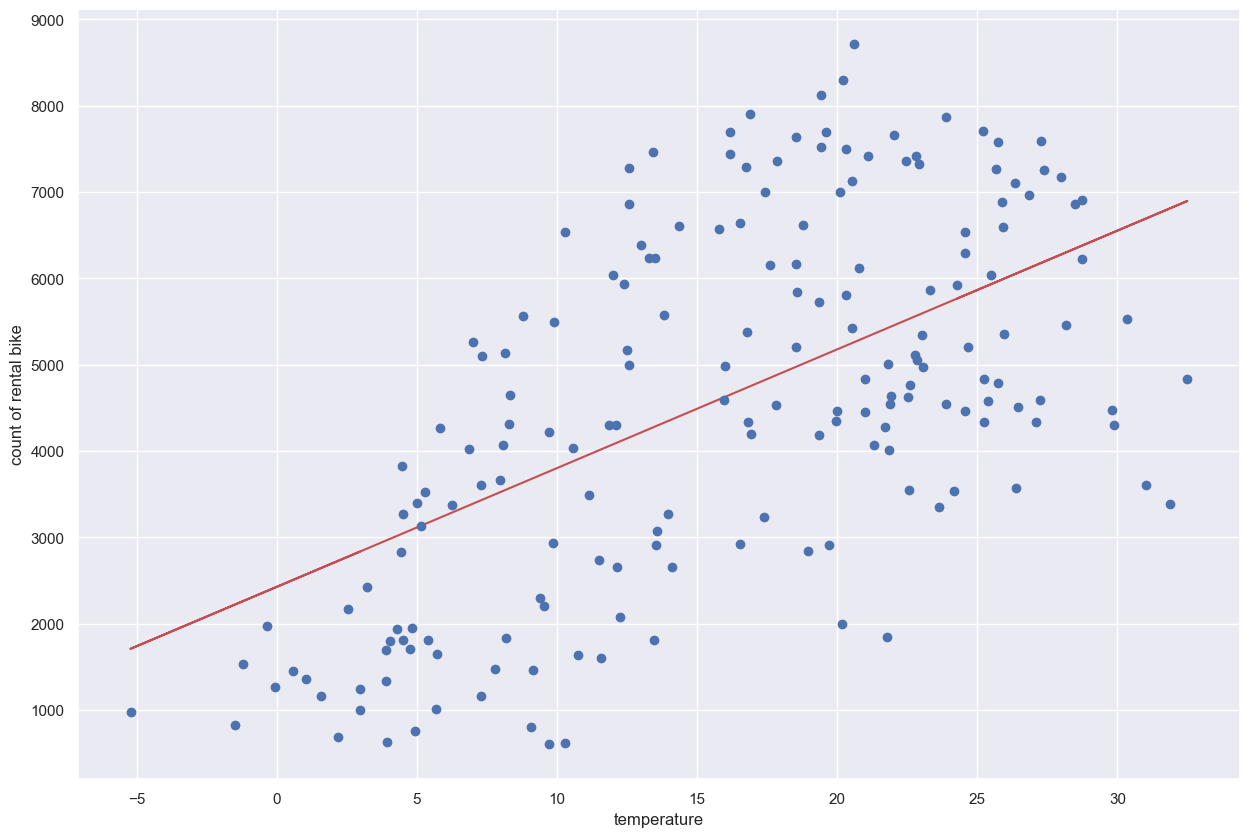

In [32]:
# https://qiita.com/fujin/items/7f0a7b6fc8fb662f510d
# feature, independent variable
X = df_day["temp_in_cel"] # temperature

# depandent variable
y = df_day["cnt"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
# I had problem here, got error message, AttributeError: 'Series' object has no attribute 'reshape'
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# prediction
y_pred = lr.predict(X_test)
# score
#
# 平均絶対誤差(MAE)
mae = mean_absolute_error(y_test, y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
# スコア
score = lr.score(X_test, y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)
plt.figure(figsize = (15,10))
plt.xlabel("temperature")
plt.ylabel("count of rental bike")
plt.plot(X_test, y_pred,"r-")
plt.plot(X_test, y_test, "o")

MAE = 1199.75,  RMSE = 1410.04,  score = 0.29
Coef =  [4442.62635963]
Intercept = 1483.442097207846


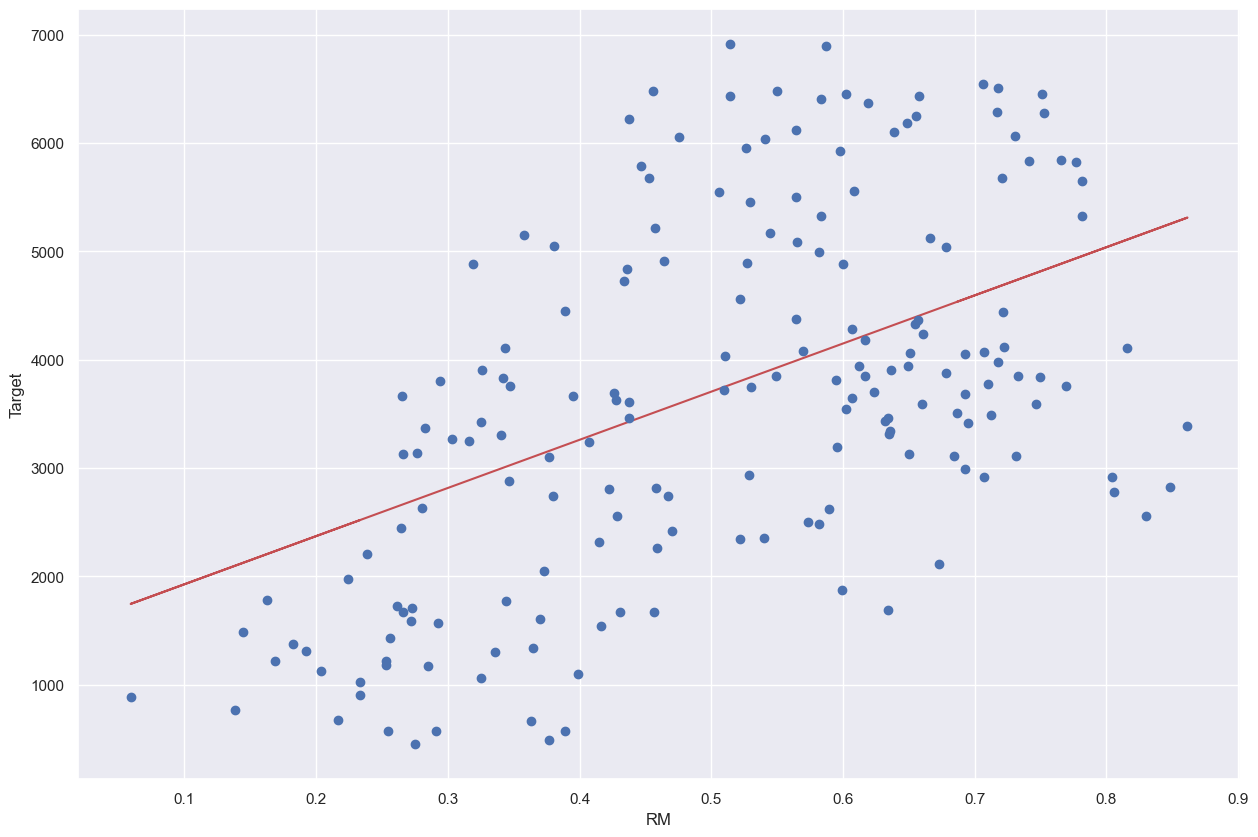

In [36]:
X = df_day["temp"] # temperature

# depandent variable
y = df_day["registered"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
# I had problem here, got error message, AttributeError: 'Series' object has no attribute 'reshape'
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# prediction
y_pred = lr.predict(X_test)
# score
#
# 平均絶対誤差(MAE)
mae = mean_absolute_error(y_test, y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
# スコア
score = lr.score(X_test, y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)
plt.figure(figsize = (15,10))
plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_test, y_pred, "r-")
plt.plot(X_test, y_test, "o")

MAE = 439.20,  RMSE = 625.86,  score = 0.26
Coef =  [2021.34128561]
Intercept = -155.51128683937918


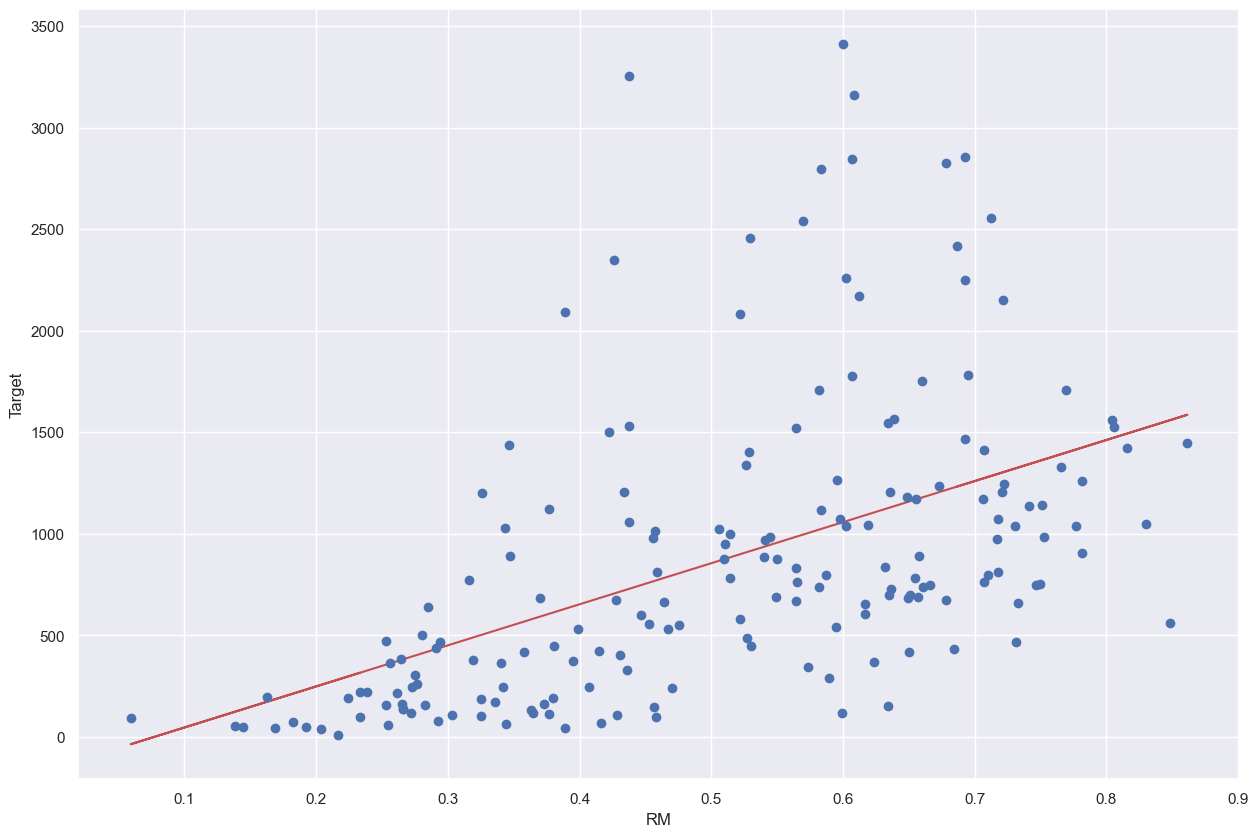

In [35]:
X = df_day["temp"] # temperature

# depandent variable
y = df_day["casual"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
# I had problem here, got error message, AttributeError: 'Series' object has no attribute 'reshape'
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# prediction
y_pred = lr.predict(X_test)
# score
#
# 平均絶対誤差(MAE)
mae = mean_absolute_error(y_test, y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
# スコア
score = lr.score(X_test, y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)
plt.figure(figsize = (15,10))
plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_test, y_pred, "r-")
plt.plot(X_test, y_test, "o")

MAE = 1764.62,  RMSE = 2104.52,  score = 0.00
Coef =  [-99.93570844]
Intercept = 5777.301677467769


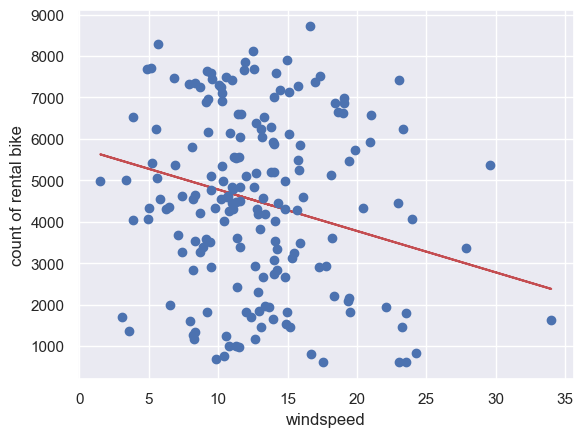

In [33]:
# https://qiita.com/fujin/items/7f0a7b6fc8fb662f510d
# feature, independent variable
X = df_day["windspeed_a"] # temperature

# depandent variable
y = df_day["cnt"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
# I had problem here, got error message, AttributeError: 'Series' object has no attribute 'reshape'
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# prediction
y_pred = lr.predict(X_test)
# score
#
# 平均絶対誤差(MAE)
mae = mean_absolute_error(y_test, y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
# スコア
score = lr.score(X_test, y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)

plt.xlabel("windspeed")
plt.ylabel("count of rental bike")
plt.plot(X_test, y_pred, "r-")
plt.plot(X_test, y_test, "o")

according to heatmap i chose two independent variables. temperature and season;polynomial regression

In [ ]:
X = df_day[["temp_in_cel","season" ]] # temperature

# depandent variable
y = df_day["cnt"]
#transform into 2 dimensional feature
polynomial_features = PolynomialFeatures(degree = 3)
x_poly = polynomial_features.fit_transform(X)
# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
# I had problem here, got error message, AttributeError: 'Series' object has no attribute 'reshape'
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

# LinearRegression
lr = LinearRegression()
lr.fit(x_poly, y)

# prediction
y_pred = lr.predict(x_poly)
# score
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y, y_pred)
print(f"rmse : {rmse}")
print (f"R: {r2}" )
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)

plt.xlabel("temperature")
plt.ylabel("count of rental bike")
#plt.scatter(x_poly,y)
plt.plot(x_poly, y_pred, "r-")


I made polynomial regression from this site:  https://di-acc2.com/programming/python/13862/

RMSE 学習 Train: 1391.39, テスト Test: 1523.14
R^2 学習 Train: 0.46, テスト Test: 0.44


c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12491 (\N{KATAKANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sa

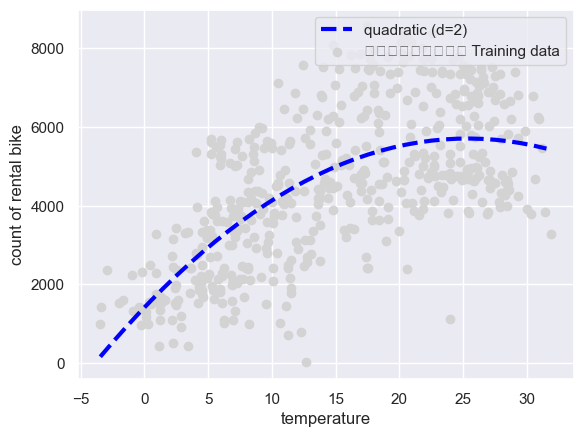

In [58]:
# independent variable
X = df_day["temp_in_cel" ] # temperature
# depandent variable
y = df_day["cnt"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
lr = LinearRegression()

# 2次の多項式特徴量のクラスをインスタンス化 instantiate 2 dimensional polynomial features
quadratic = PolynomialFeatures(
               degree = 2,                   # n dimension der polynomial 
               interaction_only = False,     # if true, ある特徴量を2乗以上した項がのぞかれる
               include_bias = True,          # if True, バイアス項を含める
               order = "C"                   # 出力する配列の計算順序
)

# データ演算・変換
X_quad_train  = quadratic.fit_transform(X_train)
# 回帰モデルに上記データを適合
lr.fit(X_quad_train, y_train)

"""データプロット　plot the data"""
# 多項式曲線を描くためのプロット
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=2)',
         color='blue', 
         lw=3,
         linestyle='--'
        )

# 推論のために学習データ＆テストデータを変換
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# 平均平方二乗誤差(RMSE)
print('RMSE 学習 Train: %.2f, テスト Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # 学習
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # テスト
      ))

# 決定係数(R^2)
print('R^2 学習 Train: %.2f, テスト Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # 学習
        r2_score(y_test,  lr.predict(X_quad_test))   # テスト
      ))

# トレーニングデータのプロット
plt.scatter(X_train, y_train, label='トレーニングデータ Training data', color='lightgray')
# グラフの書式設定
plt.xlabel('temperature')
plt.ylabel('count of rental bike')
plt.legend(loc='upper right')
plt.show()

RMSE 学習 Train: 1242.10, テスト Test: 1301.57
R^2 学習 Train: 0.34, テスト Test: 0.36


c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12491 (\N{KATAKANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sa

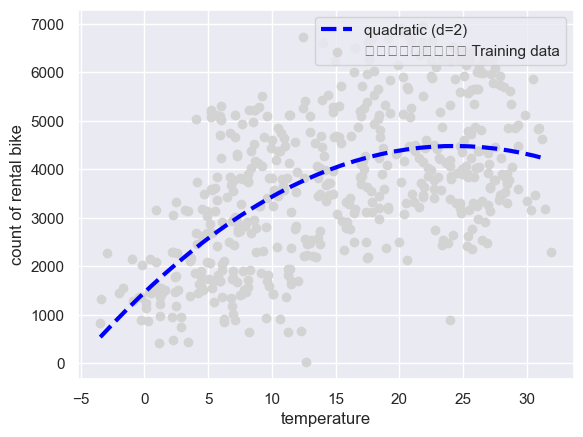

In [59]:
# independent variable
X = df_day["temp_in_cel" ] # temperature
# depandent variable
y = df_day["registered"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
# I had problem here, got error message, AttributeError: 'Series' object has no attribute 'reshape'
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

# LinearRegression
lr = LinearRegression()

# 2次の多項式特徴量のクラスをインスタンス化 instantiate 2 dimensional polynomial features
quadratic = PolynomialFeatures(
               degree = 2,                   # n dimension der polynomial 
               interaction_only = False,     # if true, ある特徴量を2乗以上した項がのぞかれる
               include_bias = True,          # if True, バイアス項を含める
               order = "C"                   # 出力する配列の計算順序
)

# データ演算・変換
X_quad_train  = quadratic.fit_transform(X_train)
# 回帰モデルに上記データを適合
lr.fit(X_quad_train, y_train)

"""データプロット　plot the data"""
# 多項式曲線を描くためのプロット
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=2)',
         color='blue', 
         lw=3,
         linestyle='--'
        )

# 推論のために学習データ＆テストデータを変換
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# 平均平方二乗誤差(RMSE)
print('RMSE 学習 Train: %.2f, テスト Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # 学習
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # テスト
      ))

# 決定係数(R^2)
print('R^2 学習 Train: %.2f, テスト Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # 学習
        r2_score(y_test,  lr.predict(X_quad_test))   # テスト
      ))

# トレーニングデータのプロット
plt.scatter(X_train, y_train, label='トレーニングデータ Training data', color='lightgray')
# グラフの書式設定
plt.xlabel('temperature')
plt.ylabel('count of rental bike')
plt.legend(loc='upper right')
plt.show()

RMSE 学習 Train: 549.36, テスト Test: 605.18
R^2 学習 Train: 0.33, テスト Test: 0.28


c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12491 (\N{KATAKANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sa

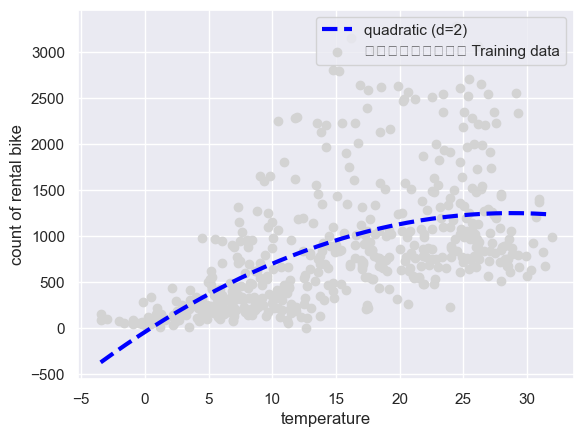

In [60]:
# independent variable
X = df_day["temp_in_cel" ] # temperature
# depandent variable
y = df_day["casual"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
# I had problem here, got error message, AttributeError: 'Series' object has no attribute 'reshape'
# https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

# LinearRegression
lr = LinearRegression()

# 2次の多項式特徴量のクラスをインスタンス化 instantiate 2 dimensional polynomial features
quadratic = PolynomialFeatures(
               degree = 2,                   # n dimension der polynomial 
               interaction_only = False,     # if true, ある特徴量を2乗以上した項がのぞかれる
               include_bias = True,          # if True, バイアス項を含める
               order = "C"                   # 出力する配列の計算順序
)

# データ演算・変換
X_quad_train  = quadratic.fit_transform(X_train)
# 回帰モデルに上記データを適合
lr.fit(X_quad_train, y_train)

"""データプロット　plot the data"""
# 多項式曲線を描くためのプロット
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=2)',
         color='blue', 
         lw=3,
         linestyle='--'
        )

# 推論のために学習データ＆テストデータを変換
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# 平均平方二乗誤差(RMSE)
print('RMSE 学習 Train: %.2f, テスト Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # 学習
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # テスト
      ))

# 決定係数(R^2)
print('R^2 学習 Train: %.2f, テスト Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # 学習
        r2_score(y_test,  lr.predict(X_quad_test))   # テスト
      ))

# トレーニングデータのプロット
plt.scatter(X_train, y_train, label='トレーニングデータ Training data', color='lightgray')
# グラフの書式設定
plt.xlabel('temperature')
plt.ylabel('count of rental bike')
plt.legend(loc='upper right')
plt.show()

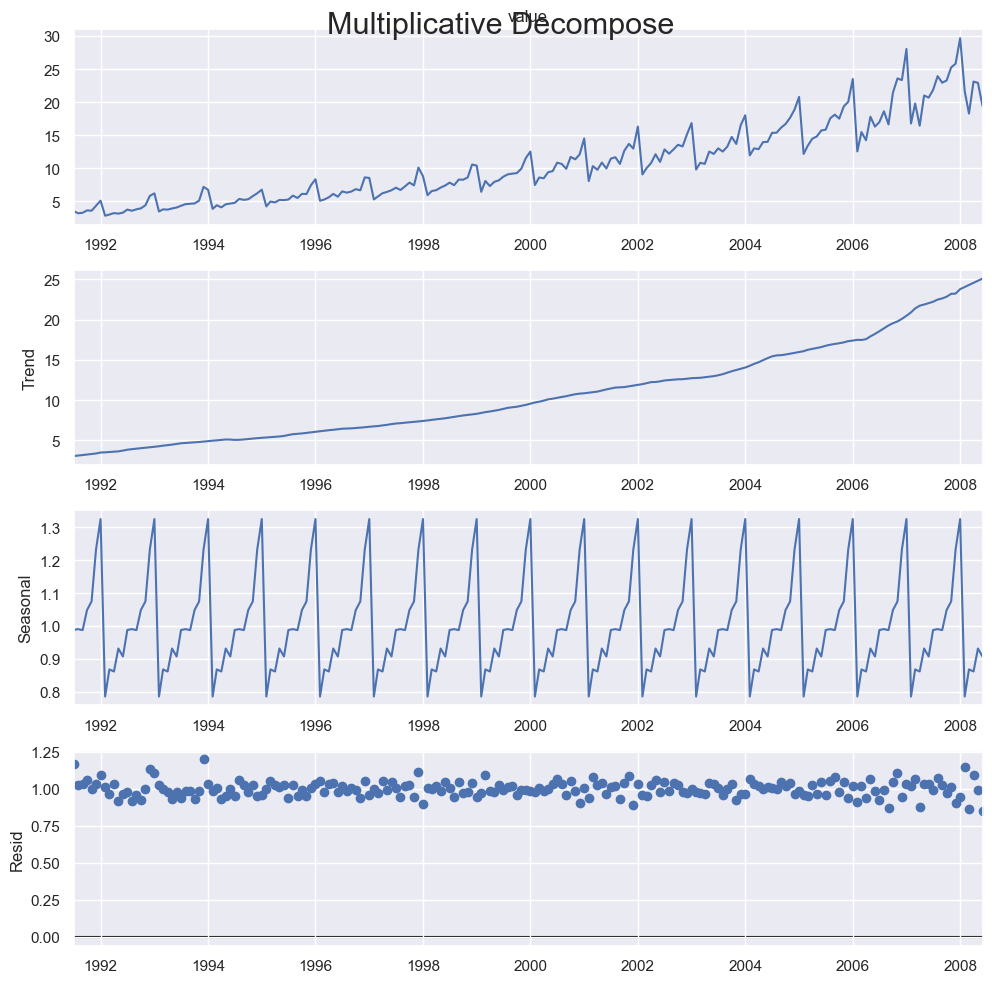

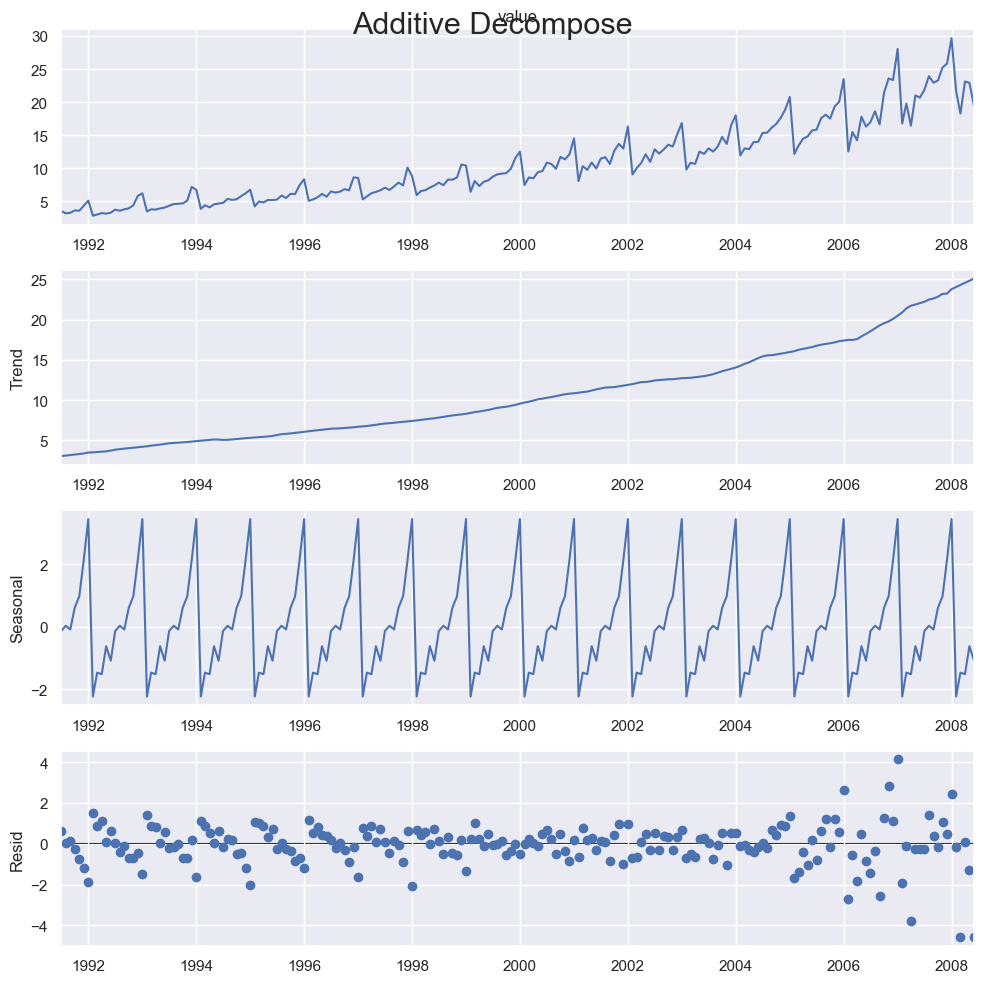

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

# setting extrapolate_trend = "freq" takes care of any missing values in the trend and residuals at the beginning of the series